In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#define common variables
channels = 3 #RGB
img_w = 64
img_h = 64
input_shape = (img_h, img_w, channels)
path = "../satellite_images/images"

In [3]:
#create tf datasets from the images: tf.Data.dataset
# labels NoTrees = 0, Trees = 1

training = tf.keras.utils.image_dataset_from_directory(directory=path,
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=16,
    image_size=(img_h, img_w),
    shuffle=True,
    seed=47,
    validation_split=0.20,
    subset='training')

test = tf.keras.utils.image_dataset_from_directory(directory=path,
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=16,
    image_size=(img_h, img_w),
    shuffle=True,
    seed=47,
    validation_split=0.20,
    subset='validation')

Found 10332 files belonging to 2 classes.
Using 8266 files for training.
Found 10332 files belonging to 2 classes.
Using 2066 files for validation.


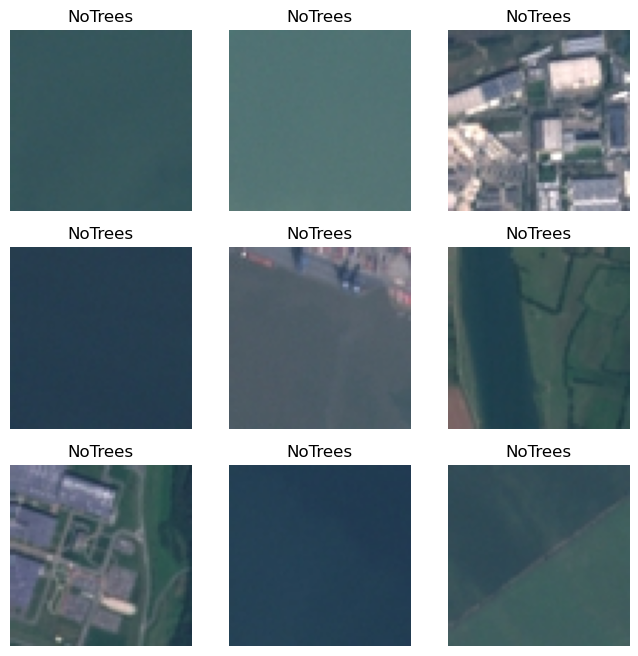

In [23]:
#show first 9 images and labels from the training set:
class_names = training.class_names

plt.figure(figsize=(8, 8))
for images, labels in training.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i], axis=None, out=None)])
        plt.axis("off")

In [10]:
# build a network from scratch
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model_1 = Sequential()
model_1.add(Rescaling((1./255), input_shape=(img_h, img_w, 3)))
model_1.add(Conv2D(16, kernel_size=3, padding='same', activation = 'relu'))
model_1.add(MaxPool2D())
model_1.add(BatchNormalization())
model_1.add(Conv2D(32, kernel_size=3, padding='same', activation= 'relu'))
model_1.add(MaxPool2D())
model_1.add(BatchNormalization())
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1, activation='softmax')) # 2 changed to 1 due to Val error: logits and labels must have the same shape


In [11]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)      

In [7]:
from time import time

In [13]:
start = time()

history = model_1.fit(training, validation_data=test, epochs=20)

end = time()

elapsed = end - start

print(f"Elapsed Time = {elapsed} seconds")

Epoch 1/20
1034/1034 [==============================] - 61s 58ms/step - loss: 0.3640 - accuracy: 0.5004 - val_loss: 0.3397 - val_accuracy: 0.5150
Epoch 2/20
1034/1034 [==============================] - 35s 34ms/step - loss: 0.2463 - accuracy: 0.5004 - val_loss: 1.2045 - val_accuracy: 0.5150
Epoch 3/20
1034/1034 [==============================] - 35s 34ms/step - loss: 0.1882 - accuracy: 0.5004 - val_loss: 0.2367 - val_accuracy: 0.5150
Epoch 4/20
1034/1034 [==============================] - 35s 34ms/step - loss: 0.1732 - accuracy: 0.5004 - val_loss: 0.1813 - val_accuracy: 0.5150
Epoch 5/20
1034/1034 [==============================] - 35s 34ms/step - loss: 0.1201 - accuracy: 0.5004 - val_loss: 0.1189 - val_accuracy: 0.5150
Epoch 6/20
1034/1034 [==============================] - 36s 35ms/step - loss: 0.1092 - accuracy: 0.5004 - val_loss: 0.7213 - val_accuracy: 0.5150
Epoch 7/20
1034/1034 [==============================] - 36s 35ms/step - loss: 0.0900 - accuracy: 0.5004 - val_loss: 0.1756 -

With that first trial model, accuracy was the same at every epoch. After researching: try sigmoid instead of softmax activation function for the output layer.

In [17]:
#model 2
model_2 = Sequential()
model_2.add(Rescaling((1./255), input_shape=(img_h, img_w, 3)))
model_2.add(Conv2D(16, kernel_size=3, padding='same', activation = 'relu'))
model_2.add(MaxPool2D())
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, kernel_size=3, padding='same', activation= 'relu'))
model_2.add(MaxPool2D())
model_2.add(BatchNormalization())
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [18]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)      

In [19]:
#training batch size was 8 for this model as output on 1/16
start = time()

history = model_2.fit(training, validation_data=test, epochs=15)

end = time()

elapsed = end - start

print(f"Elapsed Time = {elapsed} seconds")

Epoch 1/15
1034/1034 [==============================] - 35s 33ms/step - loss: 0.4227 - accuracy: 0.8356 - val_loss: 0.2541 - val_accuracy: 0.9017
Epoch 2/15
1034/1034 [==============================] - 35s 34ms/step - loss: 0.2381 - accuracy: 0.9036 - val_loss: 0.2480 - val_accuracy: 0.9095
Epoch 3/15
1034/1034 [==============================] - 35s 34ms/step - loss: 0.1710 - accuracy: 0.9332 - val_loss: 0.4014 - val_accuracy: 0.8887
Epoch 4/15
1034/1034 [==============================] - 35s 34ms/step - loss: 0.1492 - accuracy: 0.9407 - val_loss: 0.3164 - val_accuracy: 0.8582
Epoch 5/15
1034/1034 [==============================] - 35s 34ms/step - loss: 0.1198 - accuracy: 0.9543 - val_loss: 1.4884 - val_accuracy: 0.6515
Epoch 6/15
1034/1034 [==============================] - 36s 35ms/step - loss: 0.1027 - accuracy: 0.9595 - val_loss: 0.3547 - val_accuracy: 0.8500
Epoch 7/15
1034/1034 [==============================] - 36s 34ms/step - loss: 0.1175 - accuracy: 0.9566 - val_loss: 0.1729 -

Now that I have a proper model run, I'll make a function to plot the learning curves:

In [24]:
def plot_learning_curve(history):
    tr_loss = history.history['loss']
    val_loss = history.history['val_loss']
    tr_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Plot the training and validation loss
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.plot(tr_loss, label="Training Loss", color='blue')
    plt.plot(val_loss, label="Validation Loss", color='orange')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and Validation Loss")
    
    # Plot the train and val accuracy
    plt.subplot(1,2,2)
    plt.plot(tr_acc, label="Training Accuracy", color='blue')
    plt.plot(val_acc, label="Validation Accuracy", color='orange')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training and Validation Accuracy")         

    # Show the figure
    plt.show()

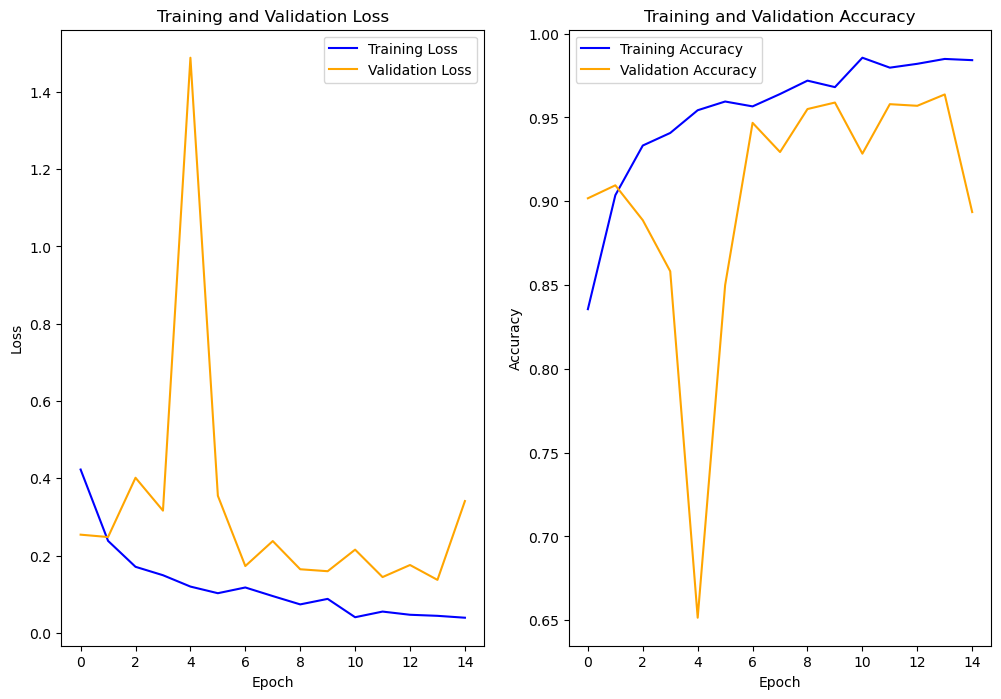

In [25]:
model_2_plots = plot_learning_curve(history)

So, it looks like improvements in the training accuracy and loss start to level off after around 10-12 epochs. The validation loss and accuracy bounce around but then appear to get worse after the 13th epoch. I will try out some different hyperparameters and run again:

In [28]:
#model 3
model_3 = Sequential()
model_3.add(Rescaling((1./255), input_shape=(img_h, img_w, 3)))
model_3.add(Conv2D(24, kernel_size=3, padding='same', activation = 'relu'))
model_3.add(MaxPool2D())
model_3.add(BatchNormalization())
model_3.add(Conv2D(48, kernel_size=3, padding='same', activation= 'relu'))
model_3.add(MaxPool2D())
model_3.add(BatchNormalization())
model_3.add(Flatten())
model_3.add(Dense(96, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 24)        672       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 24)       0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 24)       96        
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 48)        10416     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 48)      

In [30]:
#training batch size was 16 for this model as output on 1/16

from tensorflow.keras.callbacks import EarlyStopping

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=3)

start = time()

# Fit the model
history_model_3 = model_3.fit(training, validation_data=test, epochs=20, callbacks=[early_stopping_monitor])

end = time()

elapsed = end - start

print(f"Elapsed Time = {elapsed} seconds")

Epoch 1/20
517/517 [==============================] - 40s 78ms/step - loss: 0.1221 - accuracy: 0.9528 - val_loss: 0.2176 - val_accuracy: 0.8863
Epoch 2/20
517/517 [==============================] - 42s 81ms/step - loss: 0.0897 - accuracy: 0.9653 - val_loss: 0.5358 - val_accuracy: 0.8732
Epoch 3/20
517/517 [==============================] - 42s 80ms/step - loss: 0.1046 - accuracy: 0.9602 - val_loss: 0.1092 - val_accuracy: 0.9652
Epoch 4/20
517/517 [==============================] - 42s 82ms/step - loss: 0.0818 - accuracy: 0.9690 - val_loss: 0.2437 - val_accuracy: 0.9303
Epoch 5/20
517/517 [==============================] - 42s 82ms/step - loss: 0.0899 - accuracy: 0.9646 - val_loss: 1.2265 - val_accuracy: 0.6873
Epoch 6/20
517/517 [==============================] - 41s 80ms/step - loss: 0.0613 - accuracy: 0.9780 - val_loss: 0.1614 - val_accuracy: 0.9564
Elapsed Time = 249.9516351222992 seconds


So with this model, I included an early stopping callback parameter, and validation accuracy hit a peak on the 3rd epoch and did not improve past that mark after three more epochs and so training stopped.

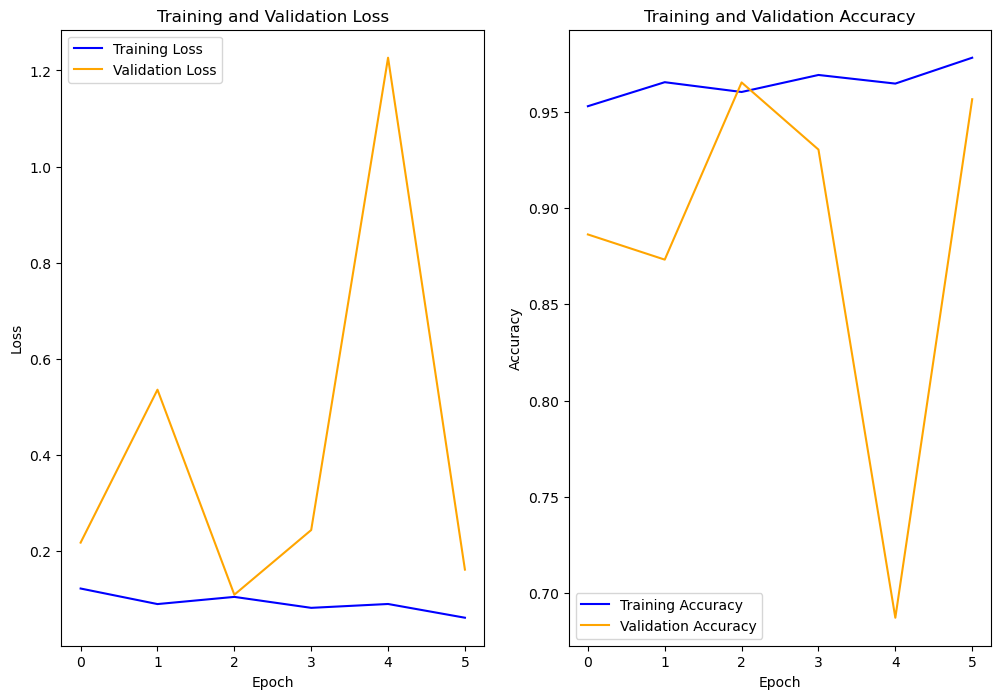

In [31]:
model_3_plots = plot_learning_curve(history_model_3)

I'll now try a model similar to the previous, but with sigmoid instead of relu activation functions for the convolutional layers:

In [32]:
#model 4
model_4 = Sequential()
model_4.add(Rescaling((1./255), input_shape=(img_h, img_w, 3)))
model_4.add(Conv2D(24, kernel_size=3, padding='same', activation = 'sigmoid'))
model_4.add(MaxPool2D())
model_4.add(BatchNormalization())
model_4.add(Conv2D(48, kernel_size=3, padding='same', activation= 'sigmoid'))
model_4.add(MaxPool2D())
model_4.add(BatchNormalization())
model_4.add(Flatten())
model_4.add(Dense(96, activation='sigmoid'))
model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 24)        672       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 24)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 24)       96        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 48)        10416     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 48)      

In [33]:
# we'll do early stopping again
start = time()

# Fit the model
history_model_4 = model_4.fit(training, validation_data=test, epochs=20, callbacks=[early_stopping_monitor])

end = time()

elapsed = end - start

print(f"Elapsed Time = {elapsed} seconds")

Epoch 1/20
517/517 [==============================] - 44s 84ms/step - loss: 0.4670 - accuracy: 0.7861 - val_loss: 0.5981 - val_accuracy: 0.8054
Epoch 2/20
517/517 [==============================] - 45s 86ms/step - loss: 0.3394 - accuracy: 0.8491 - val_loss: 0.4648 - val_accuracy: 0.8030
Epoch 3/20
517/517 [==============================] - 45s 86ms/step - loss: 0.2752 - accuracy: 0.8880 - val_loss: 0.2789 - val_accuracy: 0.8761
Epoch 4/20
517/517 [==============================] - 46s 88ms/step - loss: 0.2413 - accuracy: 0.9041 - val_loss: 0.7606 - val_accuracy: 0.5934
Epoch 5/20
517/517 [==============================] - 46s 89ms/step - loss: 0.2134 - accuracy: 0.9185 - val_loss: 0.3047 - val_accuracy: 0.8538
Epoch 6/20
517/517 [==============================] - 45s 86ms/step - loss: 0.1957 - accuracy: 0.9260 - val_loss: 0.1671 - val_accuracy: 0.9337
Epoch 7/20
517/517 [==============================] - 45s 87ms/step - loss: 0.1548 - accuracy: 0.9441 - val_loss: 0.2264 - val_accuracy:

With sigmoid activation functions in the convolutional layers, the network hits peak validation accuracy after the 9th epoch and stops early after the 12th when validation accuracy does not improve further.

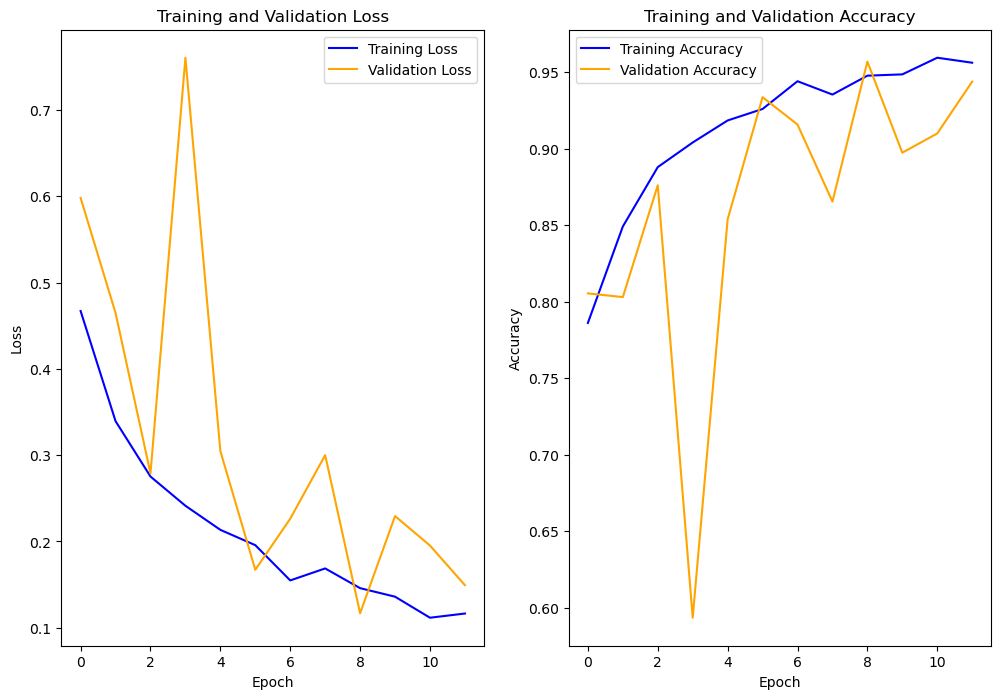

In [34]:
model_4_plots = plot_learning_curve(history_model_4)

In [36]:
max(history_model_4.history['val_accuracy'])

0.9569215774536133

In [37]:
max(history_model_3.history['val_accuracy'])

0.9651500582695007

So the network with two convolutional layers and one dense layer all using the relu activation function performed slightly better than the one with sigmoid activation functions. Next I will try an additional convolutional layer, using relu activation again.

In [38]:
#model 5
model_5 = Sequential()
model_5.add(Rescaling((1./255), input_shape=(img_h, img_w, 3)))
model_5.add(Conv2D(24, kernel_size=3, padding='same', activation = 'relu'))
model_5.add(MaxPool2D())
model_5.add(BatchNormalization())
model_5.add(Conv2D(48, kernel_size=3, padding='same', activation= 'relu'))
model_5.add(MaxPool2D())
model_5.add(BatchNormalization())
model_5.add(Conv2D(96, kernel_size=3, padding='same', activation = 'relu'))
model_5.add(Flatten())
model_5.add(Dense(96, activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))

model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 24)        672       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 24)       0         
 g2D)                                                            
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 24)       96        
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 48)        10416     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 48)      

In [39]:
# we'll do early stopping again
start = time()

# Fit the model
history_model_5 = model_5.fit(training, validation_data=test, epochs=20, callbacks=[early_stopping_monitor])

end = time()

elapsed = end - start

print(f"Elapsed Time = {elapsed} seconds")

Epoch 1/20
517/517 [==============================] - 58s 111ms/step - loss: 0.3853 - accuracy: 0.8591 - val_loss: 0.3097 - val_accuracy: 0.9027
Epoch 2/20
517/517 [==============================] - 57s 111ms/step - loss: 0.2330 - accuracy: 0.9061 - val_loss: 1.8636 - val_accuracy: 0.4927
Epoch 3/20
517/517 [==============================] - 57s 111ms/step - loss: 0.2066 - accuracy: 0.9177 - val_loss: 0.3127 - val_accuracy: 0.8761
Epoch 4/20
517/517 [==============================] - 58s 112ms/step - loss: 0.1820 - accuracy: 0.9261 - val_loss: 0.5343 - val_accuracy: 0.7420
Elapsed Time = 231.16218447685242 seconds
